In [2]:
from sklearn.datasets import load_iris
iris = load_iris(as_frame=True)

In [3]:
list(iris)

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [5]:
iris.data.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [6]:
iris.target.head(3)

,target
0,0
1,0
2,0


In [7]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [8]:
# 데이터 분할하고 로지스틱 회귀 훈련
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = iris.data[["petal width (cm)"]].values
y = iris.target_names[iris.target] == 'virginica'
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=42)

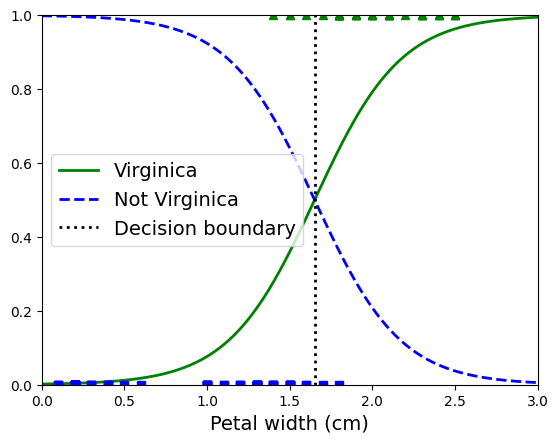

In [14]:
# 추정 확률 계산
import numpy as np
import matplotlib.pyplot as plt

X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0, 0]

plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Virginica")
plt.plot([decision_boundary, decision_boundary], [0, 1], 'k:', linewidth=2, label="Decision boundary")
plt.plot(X_train[y_train == 0], y_train[y_train == 0], "bs")
plt.plot(X_train[y_train == 1], y_train[y_train == 1], "g^")
plt.legend(loc="center left", fontsize=14)
plt.xlabel("Petal width (cm)", fontsize=14)
plt.axis([0, 3, 0, 1])
plt.show()

In [15]:
decision_boundary

1.6516516516516517

In [16]:
log_reg.predict([[1.7], [1.5]])

array([ True, False])

In [17]:
# 두 개 특성으로 예측
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris.target_names[iris.target] == 'virginica'
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

log_reg = LogisticRegression(C=2, random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(C=2, random_state=42)

In [18]:
# softmax 회귀 사용
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

softmax_reg = LogisticRegression(C=30, random_state=42)
softmax_reg.fit(X_train, y_train)

LogisticRegression(C=30, random_state=42)

In [19]:
softmax_reg.predict([[5, 2]])

array([2])

In [20]:
softmax_reg.predict_proba([[5, 2]]).round(2)

array([[0.  , 0.04, 0.96]])